## Q1. What is an ensemble technique in machine learning?

Ensemble techniques combine predictions from multiple machine learning models to produce a stronger overall model. Instead of relying on a single model, ensemble learning improves performance, accuracy, and robustness.

## Q2. Why are ensemble techniques used in machine learning?

Ensemble techniques are used because they:

Reduce variance (e.g., bagging)

Reduce bias (e.g., boosting)

Improve generalization

Handle overfitting better

Combine the strengths of multiple models


## Q3. What is bagging?

Bagging (Bootstrap Aggregating) is an ensemble technique that:

Trains multiple models on random subsets (with replacement) of the training data.

Aggregates predictions (usually by voting or averaging).

Example: Random Forest

##  Q4. What is boosting?

Boosting builds models sequentially, where each new model focuses on correcting the mistakes of the previous ones. Weights are adjusted based on errors.

Reduces bias.

Example: AdaBoost, Gradient Boosting, XGBoost

## Q5. What are the benefits of using ensemble techniques?

Higher accuracy

Less overfitting

Better generalization

Can handle complex problems

Useful with weak learners (like decision stumps)

## Q6. Are ensemble techniques always better than individual models?

Not always. Ensemble models are usually better, but they:

Require more computation

Can be harder to interpret

Might not help much if base models are already optimal or data is too noisy

## Q7. How is the confidence interval calculated using bootstrap?

Bootstrap calculates confidence intervals by:

Repeatedly resampling the dataset with replacement

Computing the statistic (e.g., mean) on each sample

Taking percentiles (e.g., 2.5th and 97.5th) from the distribution of computed statistics

## Q8. How does bootstrap work and What are the steps involved in bootstrap?

Bootstrap Steps:

Take a sample of size n from the dataset with replacement.

Compute the statistic (e.g., mean).

Repeat steps 1 and 2 many times (e.g., 1000 iterations).

Sort the resulting values.

Take the 2.5th and 97.5th percentiles for a 95% confidence interval.

## Q9. Bootstrap Example: Estimate 95% Confidence Interval for Tree Height

95% Confidence Interval for Mean Height: (14.03 m, 15.09 m)


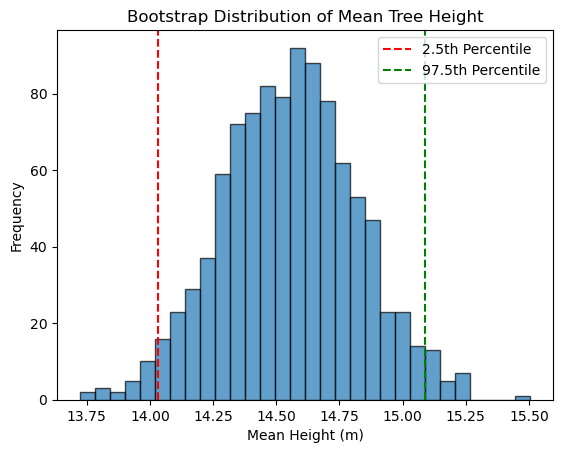

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated tree heights (sample of 50 trees)
np.random.seed(42)
sample_heights = np.random.normal(loc=15, scale=2, size=50)

# Bootstrap function
def bootstrap_mean_ci(data, num_bootstrap_samples=1000, ci=95):
    means = []
    n = len(data)
    
    for _ in range(num_bootstrap_samples):
        sample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(sample))
    
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    
    return lower, upper, means

# Calculate 95% confidence interval
lower_ci, upper_ci, bootstrap_means = bootstrap_mean_ci(sample_heights)

print(f"95% Confidence Interval for Mean Height: ({lower_ci:.2f} m, {upper_ci:.2f} m)")

# Plotting histogram of bootstrap means
plt.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(lower_ci, color='red', linestyle='--', label='2.5th Percentile')
plt.axvline(upper_ci, color='green', linestyle='--', label='97.5th Percentile')
plt.title('Bootstrap Distribution of Mean Tree Height')
plt.xlabel('Mean Height (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
